In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.6 MB/s

In [2]:
# Import all necessary libraries for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil              # For navigating files
from google.colab import drive # For mounting google drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean

# Data Import

In [4]:
# Mount the Google Drive to access the shot data data .zip files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Un-zip all the data files into Google Drive
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2007.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2008.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2009.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2010.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2011.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2012.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2013.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2014.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2015.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2016.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2017.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2018.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2019.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2020.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2021.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2022.zip
!unzip gdrive/MyDrive/MSDS696_Practicum_II/shots_2023.zip

Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2007.zip
  inflating: shots_2007.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2008.zip
  inflating: shots_2008.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2009.zip
  inflating: shots_2009.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2010.zip
  inflating: shots_2010.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2011.zip
  inflating: shots_2011.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2012.zip
  inflating: shots_2012.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2013.zip
  inflating: shots_2013.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2014.zip
  inflating: shots_2014.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2015.zip
  inflating: shots_2015.csv          
Archive:  gdrive/MyDrive/MSDS696_Practicum_II/shots_2016.zip
  inflating: shots_2016.csv          
Archive:  

In [7]:
# Define constants
SELECT_SEASONS = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
DATA_LOCATION = '/content'
CSV_BASE_NAME = 'shots_'
RANDOM_SEED = 55

In [8]:
# Initialize list of dataframes
season_dfs = []

# Iterate through each season
for iSeason in SELECT_SEASONS:

  # Create full path to the current season's shot CSV data file
  full_path_to_csv = os.path.join(DATA_LOCATION, CSV_BASE_NAME + iSeason + '.csv')

  # Create dataframe for current season and append to the running list
  season_dfs.append(pd.read_csv(full_path_to_csv))

# Concatenate all dataframes into one
shot_df = pd.concat(season_dfs, ignore_index=True)

# Data Cleaning

In [ ]:
shot_df.describe()

,shotID,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,timeSinceLastEvent,period,...,penaltyLength,playoffGame,roadTeamCode,roadTeamScore,shotGoalProbability,shotPlayContinued,timeBetweenEvents,timeLeft,wentToOT,wentToShootout
count,1.815165e+06,1.815165e+06,1.815165e+06,1.815165e+06,1.815165e+06,1.815165e+06,1.815165e+06,1.815165e+06,1.815165e+06,1.815165e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.987938e+05,2.015038e+03,6.929287e-02,2.126564e+04,5.417755e-01,1.605684e+02,1.835432e+03,1.144820e+01,1.572476e+01,2.033703e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.733797e+05,4.907752e+00,2.539516e-01,2.462625e+03,4.982519e-01,9.222534e+01,1.058288e+03,1.496453e+01,1.492525e+01,8.467103e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,2.007000e+03,0.000000e+00,2.000100e+04,0.000000e+00,1.000000e+00,0.000000e+00,-2.147000e+03,-1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.471900e+04,2.011000e+03,0.000000e+00,2.031700e+04,0.000000e+00,8.200000e+01,9.330000e+02,1.000000e+00,5.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.662610e+05,2.015000e+03,0.000000e+00,2.063500e+04,1.000000e+00,1.590000e+02,1.823000e+03,7.000000e+00,1.100000e+01,2.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.200520e+05,2.019000e+03,0.000000e+00,2.097100e+04,1.000000e+00,2.350000e+02,2.727000e+03,1.600000e+01,2.100000e+01,3.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.173843e+06,2.023000e+03,1.000000e+00,3.041700e+04,1.000000e+00,7.760000e+02,9.027000e+03,1.284000e+03,2.810000e+02,8.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Get all column names
cols = shot_df.columns
for iCol in range(cols.size):
  print(cols[iCol])

In [9]:
# Create copy of original dataframe in case needed
shot_df_copy = shot_df.copy()

In [10]:
# List out all the columns that we wish to analyze moving forward
cols_to_keep = ['arenaAdjustedShotDistance', 'arenaAdjustedXCordABS', 'arenaAdjustedYCordAbs', 'awaySkatersOnIce', 'awayTeamCode', 'distanceFromLastEvent', 'event', 'homeSkatersOnIce', 'homeTeamCode', 'isHomeTeam', 'lastEventCategory', 'offWing', 'playerPositionThatDidEvent', 'shootingTeamAverageTimeOnIce', 'shotAngleAdjusted', 'shotAngleReboundRoyalRoad', 'shotOnEmptyNet', 'shotRebound', 'shotRush', 'shotType', 'speedFromLastEvent', 'timeSinceFaceoff', 'timeSinceLastEvent']

In [11]:
# Remove all other, nonessential columns from the dataframe
for iCol in shot_df.columns:
  if iCol not in cols_to_keep:
    shot_df.drop(iCol, axis=1, inplace=True)

In [12]:
# Remove all shots from games that do not involve the CO Avalanche
index_non_avs = shot_df[(shot_df['awayTeamCode'] != 'COL') & (shot_df['homeTeamCode'] != 'COL')].index
shot_df.drop(index_non_avs, inplace=True)
shot_df.head(15)

,homeTeamCode,awayTeamCode,timeSinceLastEvent,event,shotAngleAdjusted,shotAngleReboundRoyalRoad,shotType,shotOnEmptyNet,shotRebound,shotRush,...,homeSkatersOnIce,awaySkatersOnIce,playerPositionThatDidEvent,timeSinceFaceoff,shootingTeamAverageTimeOnIce,offWing,arenaAdjustedShotDistance,arenaAdjustedYCordAbs,isHomeTeam,arenaAdjustedXCordABS
395,COL,DAL,54,SHOT,30.801446,0,SLAP,0,0,0,...,5,5,D,114,23.6,0,58.0,30.0,1.0,39.0
396,COL,DAL,20,SHOT,38.453709,0,SLAP,0,0,0,...,5,5,R,134,19.0,1,42.0,26.0,1.0,56.0
397,COL,DAL,8,SHOT,57.528808,0,BACK,0,0,0,...,5,5,L,8,8.0,0,14.0,12.0,1.0,81.0
398,COL,DAL,48,SHOT,41.423666,0,WRIST,0,0,0,...,5,5,D,67,74.4,1,44.0,29.0,0.0,56.0
399,COL,DAL,5,SHOT,70.559965,1,WRIST,0,0,0,...,5,5,R,72,79.4,0,34.0,32.0,0.0,78.0
400,COL,DAL,36,SHOT,70.974394,0,WRIST,0,0,0,...,5,5,C,178,24.8,0,28.0,26.0,0.0,80.0
401,COL,DAL,12,SHOT,41.185925,0,WRIST,0,0,0,...,5,5,R,190,26.2,0,13.0,9.0,1.0,79.0
402,COL,DAL,11,SHOT,24.034288,0,SLAP,0,0,0,...,5,4,D,11,11.2,0,70.0,29.0,1.0,25.0
403,COL,DAL,13,SHOT,45.881404,0,WRIST,0,0,0,...,5,4,C,31,23.5,0,45.0,32.0,0.0,58.0
404,COL,DAL,20,SHOT,47.726311,0,WRIST,0,0,0,...,5,5,D,45,30.8,1,17.0,13.0,0.0,78.0


In [13]:
# Remove empty net shots from the dataframe, as skew shot goal results are skewed when no goalie is present
index_empty_net = shot_df[(shot_df['shotOnEmptyNet'] == 1)].index
shot_df.drop(index_empty_net, inplace=True)

In [14]:
# Create new feature for whether or not this is an Avs home game
shot_df['isHomeGame'] = np.where(shot_df['homeTeamCode'] == 'COL', 1, 0)

In [15]:
# Remove home game shots that were taken by team that was opposing the Avalanche
index_other_team_shots = shot_df[(shot_df['isHomeGame'] == True) & (shot_df['isHomeTeam'] < 0.5)].index
shot_df.drop(index_other_team_shots, inplace=True)

In [16]:
# Repeat the above removal for Avalanche away games
index_other_team_shots = shot_df[(shot_df['isHomeGame'] == False) & (shot_df['isHomeTeam'] > 0.5)].index
shot_df.drop(index_other_team_shots, inplace=True)

In [17]:
# Print out the resulting number of shots that the Avalanche have taken since 2007
shot_df.shape[0]

57817

In [23]:
# Check for indices corresponding to missing values in the dataframe
np.where(pd.isnull(shot_df))

(array([], dtype=int64), array([], dtype=int64))

In [19]:
# Fill the missing shot types with wrist shots, as they are the most common
shot_df['shotType'].fillna('WRIST', inplace=True)

In [20]:
# Fill the missing player positions with Center, as they are most likely to take the shot
shot_df['playerPositionThatDidEvent'].fillna('C', inplace=True)

In [21]:
# Verify the wrist shots were added for missing values
print(shot_df['shotType'].unique())

['SLAP' 'BACK' 'WRIST' 'TIP' 'WRAP' 'SNAP' 'DEFL']


In [22]:
# Verify the player positions were added for missing values
print(shot_df['playerPositionThatDidEvent'].unique())

['D' 'R' 'L' 'C' 'G']


In [ ]:
shot_df.head(15)

,homeTeamCode,awayTeamCode,timeSinceLastEvent,event,shotAngleAdjusted,shotAngleReboundRoyalRoad,shotType,shotOnEmptyNet,shotRebound,shotRush,...,awaySkatersOnIce,playerPositionThatDidEvent,timeSinceFaceoff,shootingTeamAverageTimeOnIce,offWing,arenaAdjustedShotDistance,arenaAdjustedYCordAbs,isHomeTeam,arenaAdjustedXCordABS,isHomeGame
395,COL,DAL,54,SHOT,30.801446,0,SLAP,0,0,0,...,5,D,114,23.6,0,58.0,30.0,1.0,39.0,1
396,COL,DAL,20,SHOT,38.453709,0,SLAP,0,0,0,...,5,R,134,19.0,1,42.0,26.0,1.0,56.0,1
397,COL,DAL,8,SHOT,57.528808,0,BACK,0,0,0,...,5,L,8,8.0,0,14.0,12.0,1.0,81.0,1
401,COL,DAL,12,SHOT,41.185925,0,WRIST,0,0,0,...,5,R,190,26.2,0,13.0,9.0,1.0,79.0,1
402,COL,DAL,11,SHOT,24.034288,0,SLAP,0,0,0,...,4,D,11,11.2,0,70.0,29.0,1.0,25.0,1
405,COL,DAL,27,MISS,8.914927,0,SLAP,0,0,0,...,5,L,72,31.4,0,51.0,8.0,1.0,39.0,1
406,COL,DAL,13,SHOT,19.746837,0,WRIST,0,0,0,...,5,L,130,33.2,0,40.0,14.0,1.0,51.0,1
408,COL,DAL,9,MISS,31.429566,0,SLAP,0,0,0,...,5,R,36,41.4,0,41.0,21.0,1.0,54.0,1
411,COL,DAL,18,SHOT,4.398705,0,WRIST,0,0,0,...,5,D,40,23.2,0,25.0,2.0,1.0,64.0,1
412,COL,DAL,1,SHOT,46.636577,1,WRIST,0,1,0,...,5,C,41,24.2,1,24.0,17.0,1.0,73.0,1


In [24]:
# Create the label column for whether or not the Avalanche shot resulted in a goal
shot_df['isGoal'] = np.where(shot_df['event'] == 'GOAL', 1, 0)

In [25]:
# Remove features that are no longer necessary
shot_df.drop('event', axis=1, inplace=True)
shot_df.drop('shotOnEmptyNet', axis=1, inplace=True)

In [26]:
# One-hot encode the shorthanded shots using the number of Avs and opposing players on the ice
shot_df['isShortSided'] = shot_df.apply(lambda x: 1 if ((x['isHomeGame'] == 1 and (x['homeSkatersOnIce'] < x['awaySkatersOnIce'])) or
                                                        (x['isHomeGame'] == 0 and (x['homeSkatersOnIce'] > x['awaySkatersOnIce']))) else 0, axis=1)

# Repeat for even strength matchups
shot_df['isEvenStrength'] = shot_df.apply(lambda x: 1 if (x['homeSkatersOnIce'] == x['awaySkatersOnIce']) else 0, axis=1)

# Repeat for power-plays with one less opposing skater than Avs skaters on the ice
shot_df['isPowerPlay'] = shot_df.apply(lambda x: 1 if ((x['isHomeGame'] == 1 and (x['homeSkatersOnIce'] == (x['awaySkatersOnIce'] + 1))) or
                                                       (x['isHomeGame'] == 0 and (x['homeSkatersOnIce'] == (x['awaySkatersOnIce'] - 1)))) else 0, axis=1)

# Repeat for power-plays with at least two less opposing skater than Avs skaters on the ice
shot_df['isExtraPowerPlay'] = shot_df.apply(lambda x: 1 if ((x['isHomeGame'] == 1 and (x['homeSkatersOnIce'] >= (x['awaySkatersOnIce'] + 2))) or
                                                            (x['isHomeGame'] == 0 and (x['homeSkatersOnIce'] <= (x['awaySkatersOnIce'] - 2)))) else 0, axis=1)

In [27]:
# Remove features that are no longer necessary
shot_df.drop('awaySkatersOnIce', axis=1, inplace=True)
shot_df.drop('homeSkatersOnIce', axis=1, inplace=True)
shot_df.drop('awayTeamCode', axis=1, inplace=True)
shot_df.drop('homeTeamCode', axis=1, inplace=True)
shot_df.drop('isHomeTeam', axis=1, inplace=True)

In [ ]:
shot_df.head(15)

,timeSinceLastEvent,shotAngleAdjusted,shotAngleReboundRoyalRoad,shotType,shotRebound,shotRush,speedFromLastEvent,distanceFromLastEvent,lastEventCategory,playerPositionThatDidEvent,...,offWing,arenaAdjustedShotDistance,arenaAdjustedYCordAbs,arenaAdjustedXCordABS,isHomeGame,isGoal,isShortSided,isEvenStrength,isPowerPlay,isExtraPowerPlay
395,54,30.801446,0,SLAP,0,0,0.893890,48.270074,TAKE,D,...,0,58.0,30.0,39.0,1,0,0,1,0,0
396,20,38.453709,0,SLAP,0,0,0.921954,18.439089,SHOT,R,...,1,42.0,26.0,56.0,1,0,0,1,0,0
397,8,57.528808,0,BACK,0,0,2.576941,20.615528,FAC,L,...,0,14.0,12.0,81.0,1,0,0,1,0,0
401,12,41.185925,0,WRIST,0,0,13.666667,164.000000,SHOT,R,...,0,13.0,9.0,79.0,1,0,0,1,0,0
402,11,24.034288,0,SLAP,0,0,4.636364,51.000000,FAC,D,...,0,70.0,29.0,25.0,1,0,0,0,1,0
405,27,8.914927,0,SLAP,0,0,1.673648,45.188494,SHOT,L,...,0,51.0,8.0,39.0,1,0,0,1,0,0
406,13,19.746837,0,WRIST,0,0,11.317108,147.122398,HIT,L,...,0,40.0,14.0,51.0,1,0,0,1,0,0
408,9,31.429566,0,SLAP,0,0,6.376074,57.384667,GIVE,R,...,0,41.0,21.0,54.0,1,0,0,1,0,0
411,18,4.398705,0,WRIST,0,0,6.530319,117.545736,MISS,D,...,0,25.0,2.0,64.0,1,0,0,1,0,0
412,1,46.636577,1,WRIST,1,0,21.931712,21.931712,SHOT,C,...,1,24.0,17.0,73.0,1,0,0,1,0,0


In [28]:
# One-hot encode the shot type and last event categorical features
shot_df_encoded = pd.get_dummies(shot_df, columns=['shotType', 'lastEventCategory', 'playerPositionThatDidEvent'])

In [ ]:
# Verify the one-hot encoding was successful
shot_df_encoded.head(15)

,timeSinceLastEvent,shotAngleAdjusted,shotAngleReboundRoyalRoad,shotRebound,shotRush,speedFromLastEvent,distanceFromLastEvent,timeSinceFaceoff,shootingTeamAverageTimeOnIce,offWing,...,lastEventCategory_PEND,lastEventCategory_PENL,lastEventCategory_SHOT,lastEventCategory_STOP,lastEventCategory_TAKE,playerPositionThatDidEvent_C,playerPositionThatDidEvent_D,playerPositionThatDidEvent_G,playerPositionThatDidEvent_L,playerPositionThatDidEvent_R
395,54,30.801446,0,0,0,0.893890,48.270074,114,23.6,0,...,False,False,False,False,True,False,True,False,False,False
396,20,38.453709,0,0,0,0.921954,18.439089,134,19.0,1,...,False,False,True,False,False,False,False,False,False,True
397,8,57.528808,0,0,0,2.576941,20.615528,8,8.0,0,...,False,False,False,False,False,False,False,False,True,False
401,12,41.185925,0,0,0,13.666667,164.000000,190,26.2,0,...,False,False,True,False,False,False,False,False,False,True
402,11,24.034288,0,0,0,4.636364,51.000000,11,11.2,0,...,False,False,False,False,False,False,True,False,False,False
405,27,8.914927,0,0,0,1.673648,45.188494,72,31.4,0,...,False,False,True,False,False,False,False,False,True,False
406,13,19.746837,0,0,0,11.317108,147.122398,130,33.2,0,...,False,False,False,False,False,False,False,False,True,False
408,9,31.429566,0,0,0,6.376074,57.384667,36,41.4,0,...,False,False,False,False,False,False,False,False,False,True
411,18,4.398705,0,0,0,6.530319,117.545736,40,23.2,0,...,False,False,False,False,False,False,True,False,False,False
412,1,46.636577,1,1,0,21.931712,21.931712,41,24.2,1,...,False,False,True,False,False,True,False,False,False,False


# Data Training/Test Split

In [29]:
# Get the Avalanche number of non-goals and goals across all seasons
shot_df_encoded['isGoal'].value_counts()

isGoal
0    53886
1     3931
Name: count, dtype: int64

In [31]:
3931/53886 # Minority (goals) to majority (non-goals) ratio

0.07295030249044279

In [ ]:
# Define goals as the labels to predict, then convert to numpy array
goal_labels = np.array(shot_df_encoded['isGoal'])

# Remove the labels from the dataframe
shot_df_label_removed = shot_df_encoded.drop('isGoal', axis = 1)

# Capture feature names
feature_list = list(shot_df_label_removed.columns)

# Convert dataframe for features to numpy array
shot_arr = np.array(shot_df_label_removed)

In [ ]:
# Split the shot data into training and test data sets using stratification
train_shot_features, test_shot_features, train_goal_labels, test_goal_labels = train_test_split(shot_arr,
                                                                                                goal_labels,
                                                                                                test_size = 0.25,
                                                                                                random_state = RANDOM_SEED,
                                                                                                stratify = goal_labels)

In [ ]:
# Verify the split was successful
print(train_shot_features.shape)
print(test_shot_features.shape)
print(train_goal_labels.shape)
print(test_goal_labels.shape)

(43362, 44)
(14455, 44)
(43362,)
(14455,)


In [ ]:
#train_shot_features_res, train_goal_labels_res = smote.fit_resample(train_shot_features, train_goal_labels)

# Random Forest Classifier

In [ ]:
# Define range of number of estimators to use for random forest (number of trees)
num_trees_rf_range = [10, 50, 100, 150, 200, 300, 500, 750, 1000]

f1_score_list = []

# Iterate over all k values
for num_trees_rf in num_trees_rf_range:

  # Oversample the minority (goals) using Synthetic Minority Oversampling Technique (SMOTE)
  smote_over_samp = SMOTE(sampling_strategy = 0.1, random_state = RANDOM_SEED, k_neighbors = 5)

  # Undersample the majority (non-goals) at random
  rand_under_samp = RandomUnderSampler(sampling_strategy = 0.5, random_state = RANDOM_SEED)

  # Define new random forest classifier model
  rand_forest = RandomForestClassifier(n_estimators = num_trees_rf, random_state = RANDOM_SEED)

  # Create the pipeline for SMOTE, undersampling, then applying the RF model (in that order)
  pipeline_steps = [('over', smote_over_samp), ('under', rand_under_samp), ('model', rand_forest)]
  pipeline = Pipeline(pipeline_steps)

  # Run repeated Stratified KFold cross validation using the pipeline
  strat_k_fold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = RANDOM_SEED)
  all_scores = cross_val_score(pipeline,            # Pipeline with oversampling, undersampling, and RF model
                               shot_arr,            # Features of shot data
                               goal_labels,         # Labels (goal or no goal)
                               scoring = 'f1',      # Evaluating F1-score
                               cv = strat_k_fold,   # Cross validation
                               n_jobs = -1          # Run in parallel on all processors available
                               )

  # Print the average F1 score
  mean_score = mean(all_scores)
  print('For %d trees (number of estimators), the average F1-Score is %.4f' % (num_trees_rf, mean_score))

  # Append the F1 score to the running list
  f1_score_list.append(mean_score)

For 10 trees (number of estimators), the average F1-Score is 0.2116
For 50 trees (number of estimators), the average F1-Score is 0.2371
For 100 trees (number of estimators), the average F1-Score is 0.2411
For 150 trees (number of estimators), the average F1-Score is 0.2437
For 200 trees (number of estimators), the average F1-Score is 0.2442
For 300 trees (number of estimators), the average F1-Score is 0.2451
For 500 trees (number of estimators), the average F1-Score is 0.2466


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


For 750 trees (number of estimators), the average F1-Score is 0.2474


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


For 1000 trees (number of estimators), the average F1-Score is 0.2474


In [ ]:
# Plot the F1 score as number of RF estimators (trees) increases
plt.plot(num_trees_rf_range, f1_score_list)
plt.show()

In [ ]:
# Verify the oversampling was successful and that the training set is balanced between goals and non-goals
print("Before SMOTE, here is the non-goal label count: {}".format(sum(train_goal_labels == 0)))
print("Before SMOTE, here is the goal label count: {}".format(sum(train_goal_labels == 1)))
print("After SMOTE, here is the non-goal label count: {}".format(sum(train_goal_labels_res == 0)))
print("After SMOTE, here is the goal label count: {}".format(sum(train_goal_labels_res == 1)))

Before SMOTE, here is the non-goal label count: 40413
Before SMOTE, here is the goal label count: 2949
After SMOTE, here is the non-goal label count: 40413
After SMOTE, here is the goal label count: 40413


In [ ]:
# Create random forest model using 1000 decision trees
rand_forest = RandomForestClassifier(n_estimators = 1000, random_state = RANDOM_SEED)

# Add random number column to gauge feature importance

# TO DO: look into sklearn.metrics -> Mutual information: helps with unbalanced datasets

  # helps with less common features, etc

  # scikitplot.estimators for feature importance plot

# Train the model on training data
rand_forest.fit(train_shot_features_res, train_goal_labels_res)

RandomForestClassifier(n_estimators=1000, random_state=55)

In [ ]:
# Calculate importance of all shot features
feat_imp = list(rand_forest.feature_importances_)

# Create tuple that relates the importance rating with each feature name
feat_imp_tup = [(feat, imp) for feat, imp in zip(feature_list, feat_imp)]

# Sort the tuple from most important shot feature to least important
feat_imp_tup = sorted(feat_imp_tup, key = lambda x: x[1], reverse = True)

In [ ]:
# Predict goals for the test set and output the accuracy metric
goal_predictions = rand_forest.predict(test_shot_features)
accuracy_metric = accuracy_score(test_goal_labels, goal_predictions)
print("Accuracy:", accuracy_metric)

Accuracy: 0.9311656866136285


In [ ]:
# Create and display confusion matrix to see TP/FP/TN/FN counts
def display_confusion_matrix(test_labels, predictions):
  conf_mat = confusion_matrix(test_labels, predictions)
  conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['No Goal', 'Goal'])
  conf_disp.plot()
  plt.show()

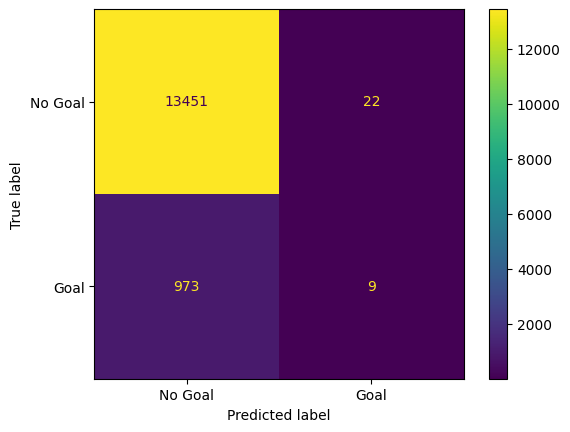

In [ ]:
display_confusion_matrix(test_goal_labels, goal_predictions)

In [ ]:
# Calculate and display the F1-score
print('F1-Score: ', f1_score(test_goal_labels, goal_predictions))

F1-Score:  0.017769002961500493


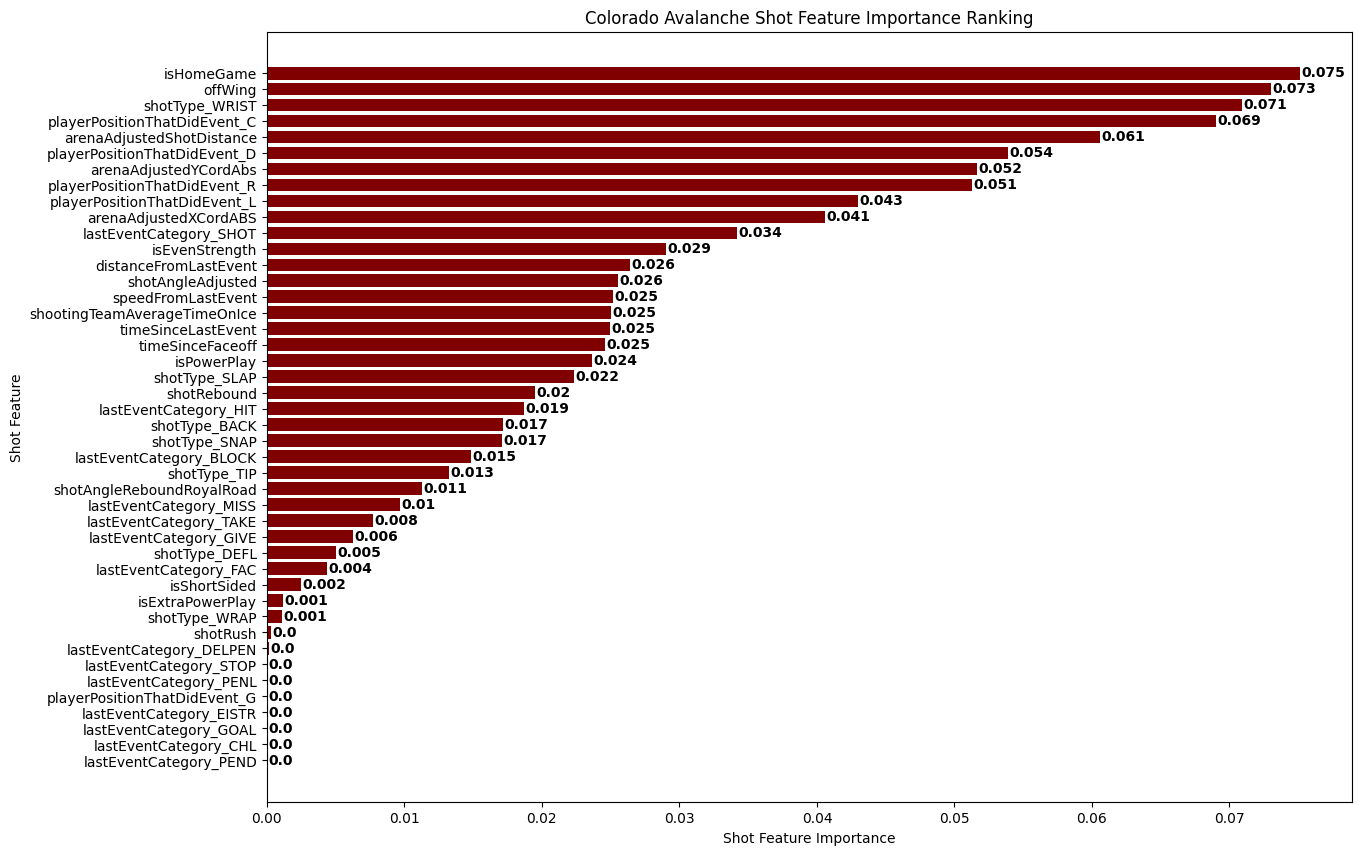

In [ ]:
# Create barplot of the feature importances
fig, ax = plt.subplots(figsize = (14, 10))
ax.barh(list(zip(*feat_imp_tup))[0], list(zip(*feat_imp_tup))[1], color = 'maroon')
ax.invert_yaxis()
for patch in ax.patches:
    plt.text(patch.get_width() + 0.0001,
             patch.get_y() + 0.63,
             str(round((patch.get_width()), 3)),
             fontsize = 10,
             fontweight = 'bold',
             color = 'black')
plt.xlabel("Shot Feature Importance")
plt.ylabel("Shot Feature")
plt.title("Colorado Avalanche Shot Feature Importance Ranking")
plt.show()

# PyCaret (AutoML)

In [32]:
# Import necessary library
import pycaret.classification as pycc

In [47]:
from imblearn.combine import SMOTETomek

In [ ]:
# Create data subset to use as the test set to eventually evaluate the final model
pycc_df_train = shot_df_encoded.sample(frac = 0.95, random_state = RANDOM_SEED).reset_index(drop = True)
pycc_df_test = shot_df_encoded.drop(pycc_df_train.index).reset_index(drop = True)

In [ ]:
# Get all feature names
cols = shot_df_encoded.columns
for iCol in range(cols.size):
  print(cols[iCol])

In [53]:
# Set up the PyCaret classification model selection tool using the shot data
smote_tomek = SMOTETomek(sampling_strategy = 0.2)
cat_features = ["isHomeGame", "isShortSided", "isEvenStrength", "isPowerPlay", "isExtraPowerPlay", "shotAngleReboundRoyalRoad", "shotRebound", "shotRush", "offWing", "shotType_BACK", "shotType_DEFL", "shotType_SLAP", "shotType_SNAP", "shotType_TIP", "shotType_WRAP", "shotType_WRIST", "lastEventCategory_BLOCK", "lastEventCategory_CHL", "lastEventCategory_DELPEN", "lastEventCategory_EISTR", "lastEventCategory_FAC", "lastEventCategory_GIVE", "lastEventCategory_GOAL", "lastEventCategory_HIT", "lastEventCategory_MISS", "lastEventCategory_PEND", "lastEventCategory_PENL", "lastEventCategory_SHOT", "lastEventCategory_STOP", "lastEventCategory_TAKE", "playerPositionThatDidEvent_C", "playerPositionThatDidEvent_D", "playerPositionThatDidEvent_G", "playerPositionThatDidEvent_L", "playerPositionThatDidEvent_R"]
pycc_setup = pycc.setup(shot_df_encoded,
                        target = 'isGoal',
                        categorical_features = cat_features,
                        train_size = 0.8,                    # Use 80% of data for training/validation sets
                        fix_imbalance = True,
                        fix_imbalance_method = smote_tomek,  # Oversample using SMOTE and undersample using Tomek Links
                        #feature_selection = True,           # Reduce overfitting and eliminate non-essential features
                        session_id = 123
                       )

,Description,Value
0,Session id,123
1,Target,isGoal
2,Target type,Binary
3,Original data shape,"(57817, 45)"
4,Transformed data shape,"(62197, 45)"
5,Transformed train set shape,"(50593, 45)"
6,Transformed test set shape,"(11564, 45)"
7,Numeric features,9
8,Categorical features,35
9,Preprocess,True


In [ ]:
# View the available models to choose from
pycc_avail_models = pycc.models()
pycc_avail_models

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [54]:
#pycc_top_model = pycc.compare_models()
pycc.compare_models(sort = 'f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9154,0.7427,0.1307,0.2589,0.1736,0.1340,0.1428,31.3840
nb,Naive Bayes,0.4134,0.0000,0.8728,0.0935,0.1688,0.0524,0.1328,32.2880
svm,SVM - Linear Kernel,0.8065,0.6699,0.3026,0.1567,0.1559,0.0911,0.1138,35.5460
knn,K Neighbors Classifier,0.8599,0.0000,0.1873,0.1305,0.1538,0.0801,0.0817,33.8270
dt,Decision Tree Classifier,0.8731,0.0000,0.1447,0.1253,0.1342,0.0662,0.0664,31.6020
qda,Quadratic Discriminant Analysis,0.0712,0.6530,0.9971,0.0680,0.1274,0.0001,-0.0001,31.9610
lr,Logistic Regression,0.9224,0.7457,0.0766,0.2616,0.1182,0.0901,0.1093,39.3810
ridge,Ridge Classifier,0.9288,0.7421,0.0289,0.2805,0.0522,0.0398,0.0701,31.1290
xgboost,Extreme Gradient Boosting,0.9304,0.0000,0.0200,0.3031,0.0374,0.0295,0.0622,34.4070
et,Extra Trees Classifier,0.9303,0.0000,0.0146,0.2700,0.0277,0.0209,0.0487,41.0530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [55]:
# Create random forest Pycaret model
pycc_rf = pycc.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9319,0.0000,0.0032,0.5000,0.0063,0.0055,0.0357
1,0.9321,0.0000,0.0063,0.6667,0.0126,0.0113,0.0605
2,0.9315,0.0000,0.0063,0.3333,0.0125,0.0099,0.0379
3,0.9319,0.0000,0.0127,0.4444,0.0248,0.0211,0.0661
4,0.9317,0.0000,0.0032,0.2500,0.0063,0.0046,0.0213
5,0.9315,0.0000,0.0032,0.2000,0.0063,0.0042,0.0173
6,0.9317,0.0000,0.0064,0.3333,0.0125,0.0100,0.0380
7,0.9315,0.0000,0.0064,0.2857,0.0125,0.0095,0.0337
8,0.9306,0.0000,0.0000,0.0000,0.0000,-0.0026,-0.0097


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
# Optimize the probability threshold used to determine whether a shot results in a goal
pycc_rf_optimized = pycc.optimize_threshold(pycc_rf, optimize = "f1") # Optimize F1 score, not accuracy

TypeError: object of type 'CustomProbabilityThresholdClassifier' has no len()

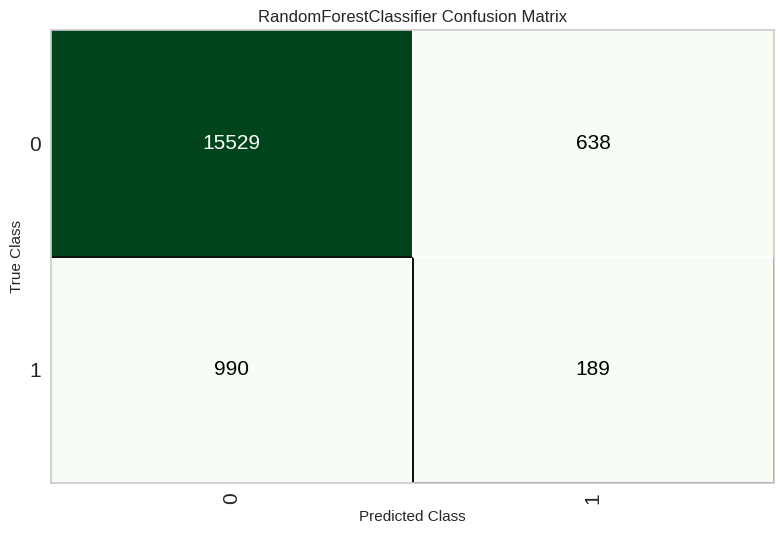

In [38]:
# Evaluate the model and display the resulting confusion matrix
#pycc.plot_model(pycc_rf_optimized, plot = 'confusion_matrix')
pycc.plot_model(pycc_rf, plot = 'confusion_matrix')

In [ ]:
# Fine tune the parameters for the random forest model
pycc_rf_tuned = pycc.tune_model(pycc_rf, optimize = "f1")

# TO DO: Try increasing 'n_iter' arg in tune_model() from 10 (default) to something greater

In [ ]:
# Evaluate the model and display the resulting confusion matrix
pycc.plot_model(pycc_rf_tuned, plot = 'confusion_matrix')

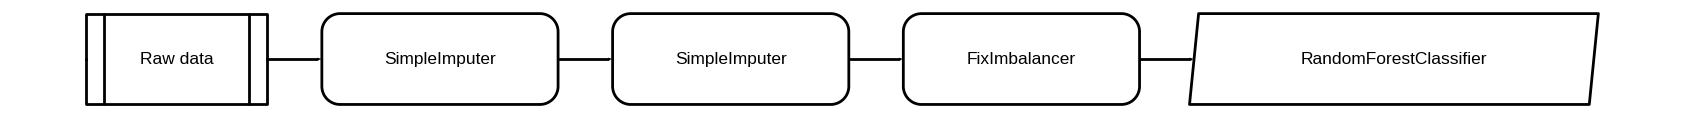

In [40]:
#pycc.plot_model(pycc_rf_tuned, plot = 'pipeline')
pycc.plot_model(pycc_rf, plot = 'pipeline')

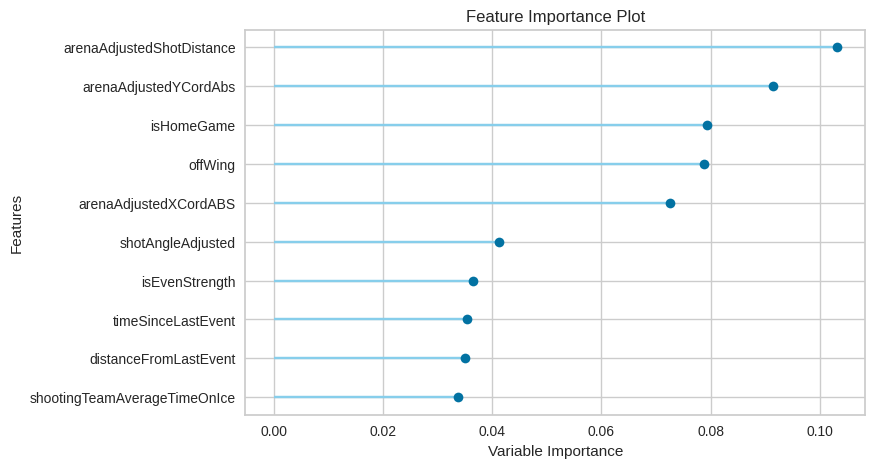

In [41]:
#pycc.plot_model(pycc_rf_tuned, plot = 'feature')
pycc.plot_model(pycc_rf, plot = 'feature')

In [ ]:
#pycc.plot_model(pycc_rf_tuned, plot = 'feature_all')
pycc.plot_model(pycc_rf, plot = 'feature_all')

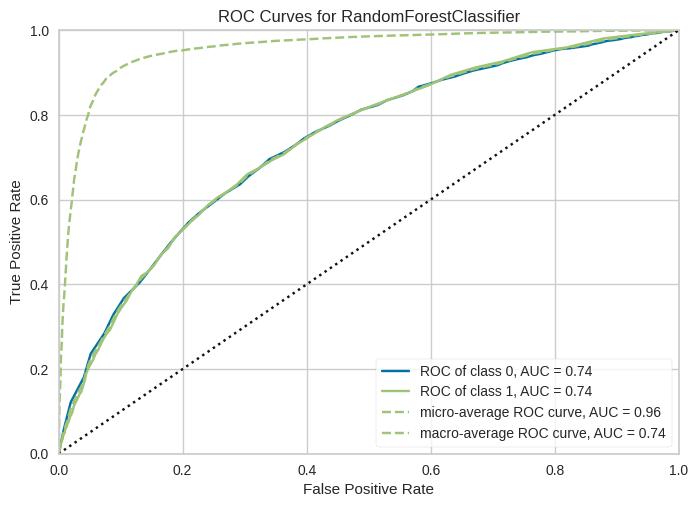

In [43]:
#pycc.plot_model(pycc_rf_tuned, plot = 'auc')
pycc.plot_model(pycc_rf, plot = "auc")

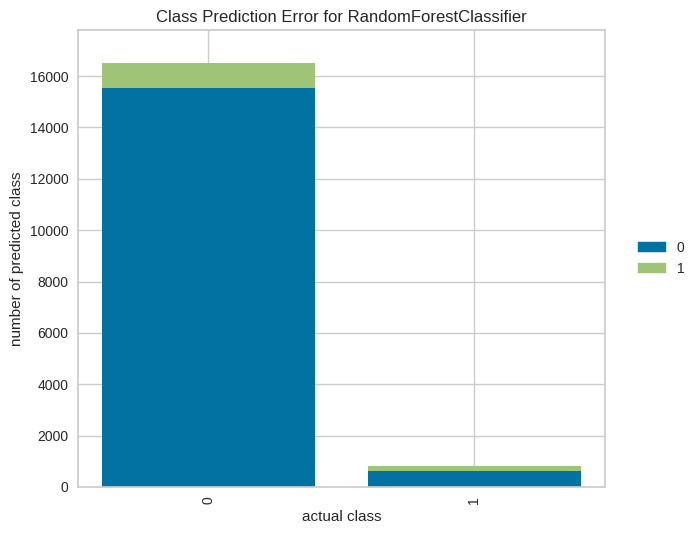

In [44]:
#pycc.plot_model(pycc_rf_tuned, plot = 'error')
pycc.plot_model(pycc_rf, plot = "error")

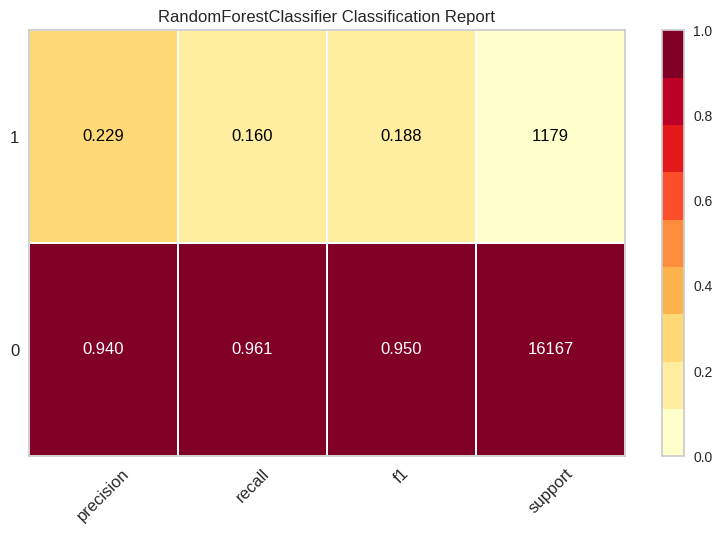

In [45]:
#pycc.plot_model(pycc_rf_tuned, plot = 'class_report')
pycc.plot_model(pycc_rf, plot = "class_report")

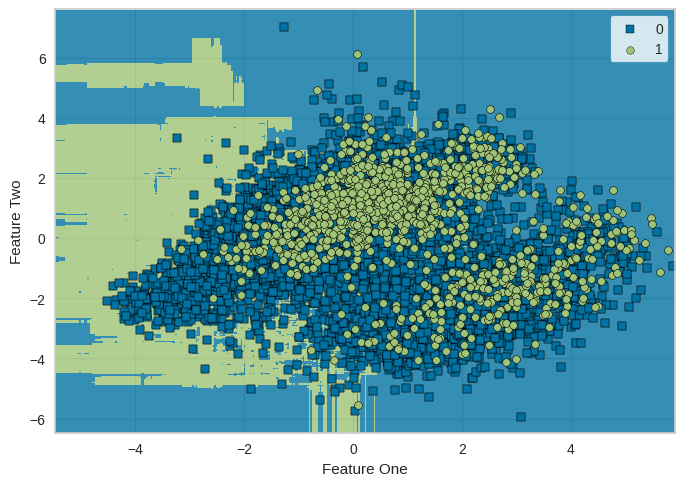

In [48]:
#pycc.plot_model(pycc_rf_tuned, plot = 'boundary')
pycc.plot_model(pycc_rf, plot = "boundary")

In [ ]:
#pycc.plot_model(pycc_rf_tuned, plot = 'threshold')
pycc.plot_model(pycc_rf, plot = "threshold")

In [ ]:
#pycc.plot_model(pycc_rf_tuned, plot = 'tree')
pycc.plot_model(pycc_rf, plot = "tree")

# TO DO

pycaret.classification ClassificationExperiment

pandas profiling: use this for correlations and plots, etc.

imputation: unknown values

make some numerical values categorical?

simple imputation is usually the mode

automl.setup(fix_imbalance=True, reature_selection=True, normalize=True, etc..)

after that, run compare_models again

imputation_type='iterative'? (dont need this since no more missing values)

data preprocessing tab from pycaret documentation!